# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rhkdg\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [41]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [42]:
#data

In [43]:
d11 = data['A11']
d12 = data['A12']
d13 = data['A13']

data['total'] = d11 + d12 +d13

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

In [44]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [45]:
spot = data['D_TRA1_1_SPOT']

In [46]:
data.shape

(10638, 248)

# 결측치 처리

In [47]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

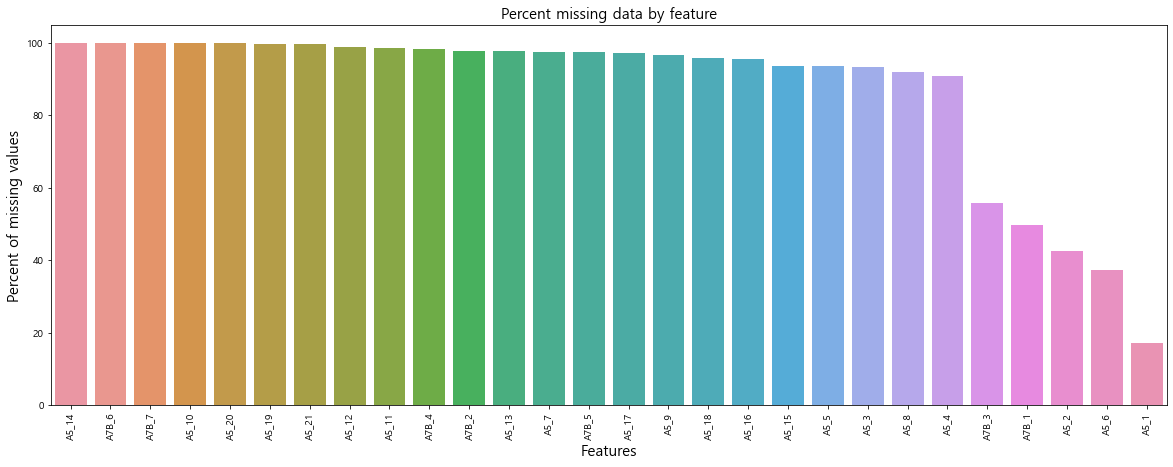

In [48]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [49]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Columns: 248 entries, D_TRA1_CHECK to total
dtypes: float64(16), int64(231), object(1)
memory usage: 20.2+ MB


In [51]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,SAGE,BJOB,BINC1,BINC2,BEDU,BMAR,BFAM,BMON,WT_DOM,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,45,1,5,3,3,2,3,8,16052,7
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,25,1,2,2,4,1,1,6,8244,7
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,53,11,5,1,3,2,3,1,10925,8
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,35,1,4,4,4,2,2,7,9279,8
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,19,12,7,1,3,1,3,2,9527,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,38,1,5,5,4,2,3,4,900,15
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,35,1,6,3,4,2,2,6,4753,15
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,41,1,4,3,4,2,3,2,3059,15


Text(0, 0.5, 'count')

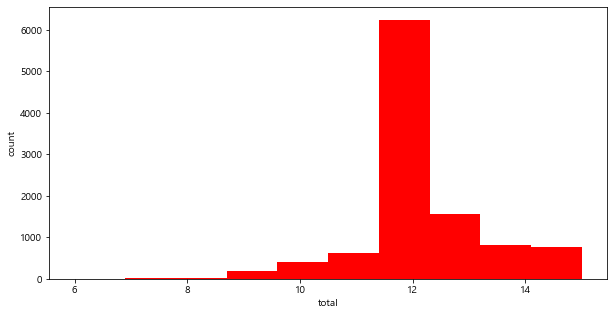

In [53]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [54]:
data.corr()['total'].sort_values().head(5)

A4_1     -0.041707
NA9E_4   -0.040783
WT_DOM   -0.040689
BJOB     -0.033211
PA9C_6   -0.030495
Name: total, dtype: float64

In [52]:
plt.figure(figsize=(15,5))
plt.scatter(x=data.index,y=data['total'],alpha=0.01, color='g')
plt.show()

KeyboardInterrupt: 